<a href="https://colab.research.google.com/github/vivianvp/Vivian-pan-projects/blob/main/ML_Chocolate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose of this Project
Managers at companies often have to analyze sales performance to make strategic decisions that impact the sales, marketing, and HR departments. The impact of their decisions could potentially affect the company’s product portfolio, HR decisions, and marketing campaign focuses. In order to
ensure their decisions are well educated, many companies perform detailed analysis on these sales reports.

*I will simulate this analysis on an example data set that a chocolate selling company may have and give recommendations based on the analysis results.*

This imaginary company has salespeople repsonsible for selling different types of choclate in different regions. The dataset I chose includes data
detailing the location of sale, type of chocolate sold, name of salesperson responsible for selling the product, and profit from the sale.

The dataset was obtained via kaggle:  https://www.kaggle.com/datasets/prajwal6362venom/choclate-sales-project

The specific dataset used is:  “chocolate portfolio project - 11.csv”

# Summary of Analysis Questions & Findings
1. **Performance by Product:**
Which type of chocolate is the best investment of money and/or performs the best?
Which one has the highest revenue? Which is the most profitable? Which is the least
profitable?
* Caramel stuffed Bars have the highest revenue.
* Baker’s Choco Chips have the highest profit. Therefore, it is the most profitable
product.
* Eclairs has the highest profit margin.
* Almond Choco has the lowest profit; therefore, is the least profitable.
* Organic Choco Syrup has the lowest profit margin. Thus, it is the worst
investment of money.
2. **Performance by Geography:**
Which regions are most profitable? Which regions have the highest cost? Which region
has the highest and lowest profit margin?
* India has the highest profit ($ 171.789k); therefore, is the most profitable region.
* Canada has the highest profit margin.
* The USA has the highest cost, lowest profit, and lowest profit margin; therefore,
is the least profitable region.
3. **Performance of Salespersons:** Which salesperson has the highest total sales revenue overall? Is there a difference if
we look at profit rather than sales revenue? Which salesperson performs the worst in
terms of profit?
* Gigi Bohling has the highest total sales revenue overall.
* Gigi Bohling has the highest profit as well; therefore, there is no difference
between looking at the profit and looking at the sales revenue.
* Oby Sorrel performs the worst in terms of profit.
4. **Based on salespeople, geography, product, and other features, predict the profit.**
- Here we utilized machine learning to predict the profit from the features. Detailed
implementation is included in the ML Profit Prediction Section.

# A look at the Data Set

In [ ]:

# Import libraries for analysis
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import re  # to remove '$', ',', '%', '(', ')'
import plotly.express as px  # for groupby
import plotly.graph_objects as go  # choropleth built-in geometries
!pip install plotly pycountry
import pycountry  # spatial data (iso)
import pickle
import matplotlib.pyplot as plt

df = pd.read_csv('/content/choclate protfolio project - 11.csv')
df


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%


# Data Pre-processing
Turning the data columns--Amount (Revnue), Profit, Cost, and Profit Margin--into *numeric* data types.

In [ ]:
df['Amount'] = df['Amount'].str.replace(r'\D', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])
# 'Amount' into numeric

pro = df['Profit']
lst = []
for row in pro:
    if '(' in row:
        neg_num = int(re.sub(r'\D', '', row)) * -1
        lst.append(neg_num)
    else:
        non_neg_num = int(re.sub(r'\D', '', row))
        lst.append(non_neg_num)
df['Profit'] = pd.Series(lst)
# 'Profit' into numeric

df['Cost'] = df['Cost'].str.replace(',', '')
df['Cost'] = pd.to_numeric(df['Cost'])
# 'Cost' into numeric

df['profit %'] = df['profit %'].str.replace('%', '').replace('#DIV/0!', '-inf')
df['profit %'] = pd.to_numeric(df['profit %'])
# 'profit %' into numeric

# Analysis of Performance by Product, Geography, & Salesperson
## Visualization of Performance by Product


In [ ]:
# Graph 1: revenue vs profit
# Sort data
product_sales_rev = df.groupby('Product')['Amount'].sum().reset_index()
product_profit = df.groupby('Product')['Profit'].sum().reset_index()
joined = product_sales_rev.merge(product_profit, left_on='Product',
                                 right_on='Product', how='outer')

# Create Graph
product_fig = go.Figure(data=[
    go.Bar(name='Revenue', x=joined['Product'], y=joined['Amount']),
    go.Bar(name='Profit', x=joined['Product'], y=joined['Profit'])
])
product_fig.update_layout(
    barmode='group',
    title_text='Revenue vs Profit (by Product)',
    yaxis=dict(
        title='USD (Thousands)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Product (Chocolate Type)',
        titlefont_size=16,
        tickfont_size=14,
        tickangle=-60
    ),
    bargap=0.3
    )

product_fig.show()

# Graph 2: Profit Margin
product_sales_rev = df.groupby('Product')['Amount'].sum()
product_profit = df.groupby('Product')['Profit'].sum()
profit_margin = ((product_profit/product_sales_rev) * 100).reset_index()
profit_margin.rename(columns={0: 'profit_margin'}, inplace=True)
pm_fig = px.bar(profit_margin, x='Product', y='profit_margin')
pm_fig.update_layout(
    title_text='Profit Margin Percentage (by Product)',
    yaxis=dict(
        title='Profit Margin (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Product (Chocolate Type)',
        titlefont_size=16,
        tickfont_size=14,
        tickangle=-60
    )
    )
pm_fig.show()

## Key Findings of Product Performance
For a company, it’s important to determine what are the best selling products, which products are
the best investment, and which products should be discontinued. To make educated decisions, we
visualized the combined revenue, profit, and profit margin percentage by product in the two charts below.
If we only looked at revenue, Caramel Stuffed Bars brought in the highest amount at \$72,373. However,
its profit percentage only reaches 54%. That means for each dollar the company receives for Caramel
Stuffed Bars, 46 percents are lost through expenses. Although the profit margin isn’t too bad, there’s
definitely better investments, where more money could be retained. If we looked at the profit margin
percentage, Eclairs would be the best investment, with the highest profit margin percentage at 88.63%.
Lastly, looking at the pure profit amount, Baker’s Choco Chips would be the best product overall for the
company. Baker’s Choco Chips bring in a profit of \$58,278, and that’s the fully retained amount, unlike
revenue. If there was more demand for Baker’s Choco Chips in the market, we would recommend the
company to increase its stock of Baker’s Choco Chips and push for more sales.


Next, we examined the worst performing products. In the Profit Margin graph, there’s an obvious
dip among the bars at Organic Choco Syrup. It has the lowest profit margin percentage at 28.18%, further
visualized by the large gap between its revenue and profit bars in the Revenue vs Profit graph. If we only
looked at its revenue numbers, we might be misled in terms of its investment worth because Organic
Choco Syrup has a total revenue of \$69,461, but in reality, the company only keeps \$19,572 of the
\$69,461. By only pure profit analysis, we would recommend the company to further investigate whether
the product is worth it to continue selling due to its extremely high expenses. Another product that doesn’t
perform well is the Almond Choco. It brings in the least amount of revenue at \$33,551 and least amount
of profit at \$14,946.

## Visualization of Performance by Geographical Region


In [ ]:
# Sort data
group_region = df.groupby('Geography').sum().reset_index()


# map each country to the corresponding iso code
def get_iso_code(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_code = country.alpha_3
        return iso_code
    except:
      if country_name == 'UK':
        return 'GBR'
      else:
        return country_name


# new columns for graphing and essential variables
group_region['ISO_code'] = group_region['Geography'].apply(get_iso_code)
group_region['Profit Margin (%)'] = (group_region['Profit'] /
                                     group_region['Amount'] * 100)
# performance by region/country
print(group_region)

# Graph 1: profit by region
pro_region = go.Figure(data=go.Choropleth(
                       locations=group_region['ISO_code'],
                       text='$',
                       z=group_region['Profit'],
                       colorscale='Oranges',
                       colorbar_tickprefix='$',
                       colorbar_title="Profit",))

pro_region.update_layout(
    title_text='Profit by Region Map',
    geo=dict(showcountries=True),
)
pro_region.show()

# Graph 2: expense by region
Cost_region = go.Figure(data=go.Choropleth(
                       locations=group_region['ISO_code'],
                       text='$',
                       z=group_region['Cost'],
                       colorscale='Oranges',
                       colorbar_tickprefix='$',
                       colorbar_title="Cost",
))

Cost_region.update_layout(
    title_text='Cost by Region Map',
    geo=dict(showcountries=True),

)
Cost_region.show()

# Graph 3: profit margin by region
pro_mar_region = go.Figure(data=go.Choropleth(
                       locations=group_region['ISO_code'],
                       text='%',
                       z=group_region['Profit Margin (%)'],
                       colorscale='Oranges',
                       colorbar_title="Profit Margin (%)",
))

pro_mar_region.update_layout(
    title_text='Profit margin by Region Map',
    geo=dict(showcountries=True),
)
pro_mar_region.show()

     Geography  Amount  Units  cost per unit    Cost  Profit  profit %  \
0    Australia  168679   6264            437   60689  107992   -1379.0   
1       Canada  237944   7302            462   68260  169686      47.0   
2        India  252469   8760            525   80681  171789    2580.0   
3  New Zealand  218813   7431            489   68927  149887   -5219.0   
4           UK  173530   5745            375   53941  119590       NaN   
5          USA  189434  10158            554  107213   82221    -525.0   

  ISO_code  Profit Margin (%)  
0      AUS          64.022196  
1      CAN          71.313418  
2      IND          68.043601  
3      NZL          68.500043  
4      GBR          68.916038  
5      USA          43.403507  


<ipython-input-52-0c802d5352c1>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## Key Findings of Geographical Performance

The revenue figures indicate that India leads with a substantial 252.469k USD, followed closely by Canada at 237.944k USD, New Zealand with 218.813k USD, the USA at 189.434k USD, the UK with 173.530k USD, and Australia trailing at 168.679k USD. This hierarchy in revenue generation showcases the varying levels of market penetration and sales performance across these countries.

When examining the units sold, a different pattern emerges. The USA tops the list with a total of 10,158 units sold, surpassing India's 8,760 units, New Zealand's 7,431 units, Canada's 7,302 units, Australia's 6,264 units, and the UK's 5,745 units. This discrepancy between revenue and units sold highlights the impact of pricing strategies and product mix on revenue outcomes.

The profit margin analysis further complicates the landscape, with Canada leading at an impressive 71.3%, followed by the UK at 68.9%, New Zealand at 68.5%, India at 68.0%, Australia at 64.0%, and the USA at a significantly lower 43.4%. This indicates that despite lower sales volumes or revenues, higher profit margins can substantially contribute to overall profitability.

In terms of absolute profit, India again takes the lead with 171.789k USD, underscoring its effective balance between volume and margin. Canada follows with 169.686k USD profit, benefiting from the highest profit margin among the regions. New Zealand, the UK, Australia, and the USA follow in descending order of profit generated.

The analysis underscores the importance of considering all these factors in tandem when assessing regional performance. For instance, despite the USA's highest sales volume, its profit margin is the lowest, resulting in the least profit among the analyzed regions. This suggests a high cost per unit sold, diluting the financial success of its sales efforts.

Canada, with its leading profit margin and significant profit, albeit lower units sold, represents a critical area for potential growth. The high profit margin suggests operational efficiency or premium pricing, which, if leveraged with increased sales volumes, could enhance profitability. Therefore, it might be prudent to target Canada for increased marketing efforts. Although this could potentially reduce the profit margin slightly due to increased costs, the expectation would be for volume growth to offset this, warranting a trial for a quarter or two to assess the impact.

Conversely, the US market, despite its lower profitability metrics, still contributes positively to the overall financial landscape. It may benefit from a review of operational efficiencies, production levels, and marketing expenditures to align costs with the revenue potential, ensuring that the region maintains or improves its contribution to the bottom line without necessitating a reduction in market presence.

## Visualization of Performance by Salesperson



In [ ]:
# Graph 1: Revenue by Sales Person
sales_rev = df.groupby('Sales Person')['Amount'].sum().reset_index()
fig_sr = px.bar(sales_rev, x='Sales Person', y='Amount',
                title='Revenue by Salesperson')
fig_sr.update_layout(yaxis_title='Revenue (Dollar)')
fig_sr.show()
print(sales_rev)

# Graph 2: Profit by Sales Person
sales_profit = df.groupby('Sales Person')['Profit'].sum().reset_index()
fig_sp = px.bar(sales_profit, x='Sales Person', y='Profit',
                title='Profit by Salesperson')
fig_sp.update_layout(yaxis=dict(title='Profit (Dollar)'))
fig_sp.show()
print(sales_profit)

# Graph 3: Units by Sales Person
sales_unit = df.groupby('Sales Person')['Units'].sum().reset_index()
fig_unit = px.bar(sales_unit, x='Sales Person', y='Units',
                title='Units by Salesperson')
fig_unit.update_layout(yaxis_title='Units')
fig_unit.show()
print(sales_unit)

      Sales Person  Amount
0     Barr Faughny  123949
1      Brien Boise   98084
2     Carla Molina   98210
3     Ches Bonnell  149975
4   Curtice Advani  130697
5     Gigi Bohling  165725
6  Gunar Cockshoot  106834
7     Husein Augar  132580
8       Oby Sorrel   83216
9       Ram Mahesh  151599


      Sales Person  Profit
0     Barr Faughny   85109
1      Brien Boise   52771
2     Carla Molina   60450
3     Ches Bonnell   99695
4   Curtice Advani   69419
5     Gigi Bohling  135191
6  Gunar Cockshoot   60065
7     Husein Augar   89427
8       Oby Sorrel   47974
9       Ram Mahesh  101064


      Sales Person  Units
0     Barr Faughny   4110
1      Brien Boise   4704
2     Carla Molina   3867
3     Ches Bonnell   5295
4   Curtice Advani   5925
5     Gigi Bohling   3669
6  Gunar Cockshoot   5007
7     Husein Augar   4554
8       Oby Sorrel   3843
9       Ram Mahesh   4686


## Key Findings in Individual Salesperson Performance

At the forefront of this analysis is Gigi Bohling, who remarkably led in both revenue and profit, with figures standing at \$165.725k and \$135.191k, respectively. This exceptional performance is noteworthy, especially considering Bohling's lower sales volume, which contrasts sharply with the conventional expectation that higher unit sales correlate with greater financial outcomes. Following closely in performance is Ram Mahesh, who generated \$151.599k in revenue and \$101.064k in profit, distinguishing himself as one of the top contributors to profitability alongside Bohling.

The data further highlights the performance of Ches Bonnell and Curtice Advani, who demonstrated significant prowess in unit sales. Advani topped the chart with 5,925 units, followed by Bonnell with 5,295 units. Despite Advani's leading position in sales volume, he did not mirror this success in revenue or profit, where he ranked lower. This discrepancy underscores the multifaceted nature of sales performance, where high sales volume does not necessarily equate to superior financial results. Bonnell, on the other hand, managed to secure a strong position in both revenue (\$149.975k) and profit (\$99.695k), indicating a more balanced performance across the metrics.

The analysis also sheds light on the lower spectrum of performance, with Oby Sorrel at the base, having sold 3,843 units and generated the least revenue and profit, at \$83.216k and \$47.974k, respectively. This underscores the challenges faced by some salespersons in translating unit sales into substantial revenue and profit.

The overarching observation from this analysis is the standout performance of Gigi Bohling, who achieved the highest revenue and profit despite selling the least amount of product among the top performers. This anomaly suggests the influence of external factors, such as product type and regional dynamics, which may have afforded Bohling a competitive advantage, potentially through targeting high-value products or lucrative markets such as Canada and Eclairs. The implication here is that sales efficiency, product strategy, and market focus are critical drivers of success, sometimes more so than sheer volume of sales.

## Machine Learning

In [ ]:
# Preprocess the data
X = df[['Sales Person', 'Geography', 'Product', 'Amount',
        'Units', 'cost per unit', 'Cost']]
y = df['Profit']

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X,
                           columns=['Sales Person',
                                    'Geography', 'Product'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Create untrained model
model = SVR()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12090761.23958019
Root Mean Squared Error: 3477.1771941591055
R-squared: -4.5480031257039144e-05


In [ ]:
# Save the trained model to a file
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))

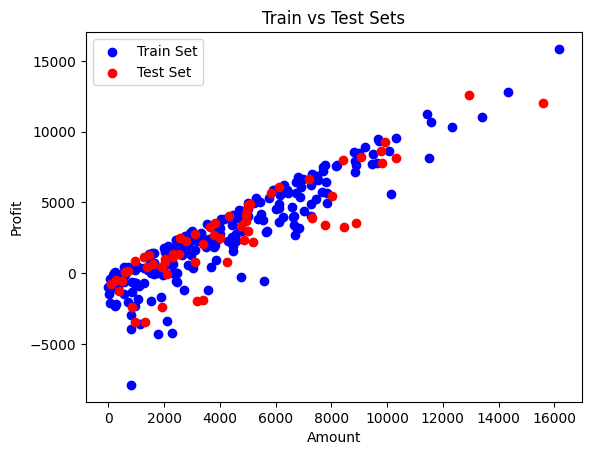

In [ ]:
# Plot the train set
plt.scatter(X_train['Amount'], y_train, color='blue', label='Train Set')
# Plot the test set
plt.scatter(X_test['Amount'], y_test, color='red', label='Test Set')

# Set plot labels and title
plt.xlabel('Amount')
plt.ylabel('Profit')
plt.title('Train vs Test Sets')

# Add legend
plt.legend()

# Display the plot
plt.show()